In [1]:
# 이번주까지는 데이터분석을 마저 진행하고 금주내에 머신러닝, 딥러닝을 진행할 것임
# 현재 6월 24일부터 프로젝트를 진행하게 되어 있는데 소개해야 될 내용이 많아서 수업을 더 진행해야 될 것 같음
# 오전은 수업 오후는 플젝 및 주제 선정하는 등의 작업을 해야될 듯함
# 8월 19일까지 플젝 기간임.
# 이것에 대해서는 매니저와 협의해서 이번달 말까지 자연어처리쪽은 깊게 들어가서 다루는 쪽으로...

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
scientists = pd.read_csv('data2/scientists.csv')
scientists

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [4]:
ages = scientists['Age']
print(ages.max())
print(ages.mean())
print(ages[ages>ages.mean()])
print(ages+ages)

90
59.125
1    61
2    90
3    66
7    77
Name: Age, dtype: int64
0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64


In [5]:
print(ages + pd.Series([1,100]))

0     38.0
1    161.0
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
dtype: float64


In [6]:
print(scientists[scientists['Age'] > scientists['Age'].mean()])

                   Name        Born        Died  Age     Occupation
1        William Gosset  1876-06-13  1937-10-16   61   Statistician
2  Florence Nightingale  1820-05-12  1910-08-13   90          Nurse
3           Marie Curie  1867-11-07  1934-07-04   66        Chemist
7          Johann Gauss  1777-04-30  1855-02-23   77  Mathematician


In [7]:
print(scientists * 2)

                                       Name                  Born  \
0        Rosaline FranklinRosaline Franklin  1920-07-251920-07-25   
1              William GossetWilliam Gosset  1876-06-131876-06-13   
2  Florence NightingaleFlorence Nightingale  1820-05-121820-05-12   
3                    Marie CurieMarie Curie  1867-11-071867-11-07   
4                Rachel CarsonRachel Carson  1907-05-271907-05-27   
5                        John SnowJohn Snow  1813-03-151813-03-15   
6                    Alan TuringAlan Turing  1912-06-231912-06-23   
7                  Johann GaussJohann Gauss  1777-04-301777-04-30   

                   Died  Age                            Occupation  
0  1958-04-161958-04-16   74                        ChemistChemist  
1  1937-10-161937-10-16  122              StatisticianStatistician  
2  1910-08-131910-08-13  180                            NurseNurse  
3  1934-07-041934-07-04  132                        ChemistChemist  
4  1964-04-141964-04-14  112     

In [8]:
scientists['Born'] # 문자형식으로 인식함

0    1920-07-25
1    1876-06-13
2    1820-05-12
3    1867-11-07
4    1907-05-27
5    1813-03-15
6    1912-06-23
7    1777-04-30
Name: Born, dtype: object

In [9]:
born_datetime = pd.to_datetime(scientists['Born'], format='%Y-%m-%d')
born_datetime

0   1920-07-25
1   1876-06-13
2   1820-05-12
3   1867-11-07
4   1907-05-27
5   1813-03-15
6   1912-06-23
7   1777-04-30
Name: Born, dtype: datetime64[ns]

In [10]:
died_datetime = pd.to_datetime(scientists['Died'], format='%Y-%m-%d')
died_datetime

0   1958-04-16
1   1937-10-16
2   1910-08-13
3   1934-07-04
4   1964-04-14
5   1858-06-16
6   1954-06-07
7   1855-02-23
Name: Died, dtype: datetime64[ns]

In [11]:
scientists['born_dt'], scientists['died_dt'] = (born_datetime, died_datetime)
print(scientists.head())

                   Name        Born        Died  Age    Occupation    born_dt  \
0     Rosaline Franklin  1920-07-25  1958-04-16   37       Chemist 1920-07-25   
1        William Gosset  1876-06-13  1937-10-16   61  Statistician 1876-06-13   
2  Florence Nightingale  1820-05-12  1910-08-13   90         Nurse 1820-05-12   
3           Marie Curie  1867-11-07  1934-07-04   66       Chemist 1867-11-07   
4         Rachel Carson  1907-05-27  1964-04-14   56     Biologist 1907-05-27   

     died_dt  
0 1958-04-16  
1 1937-10-16  
2 1910-08-13  
3 1934-07-04  
4 1964-04-14  


In [12]:
scientists.shape

(8, 7)

In [13]:
scientists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Name        8 non-null      object        
 1   Born        8 non-null      object        
 2   Died        8 non-null      object        
 3   Age         8 non-null      int64         
 4   Occupation  8 non-null      object        
 5   born_dt     8 non-null      datetime64[ns]
 6   died_dt     8 non-null      datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 576.0+ bytes


In [14]:
# 생존기간(일) 출력
scientists['age_days_dt'] = scientists.died_dt - scientists.born_dt
scientists

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days_dt
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,13779 days
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,22404 days
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,32964 days
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,24345 days
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,20777 days
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,16529 days
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,15324 days
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,28422 days


In [15]:
import seaborn as sns 
anscombe = sns.load_dataset("anscombe") 
print(anscombe)

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

In [16]:
dataset_1 = anscombe[anscombe['dataset'] == 'I']
dataset_2 = anscombe[anscombe['dataset'] == 'II'] 
dataset_3 = anscombe[anscombe['dataset'] == 'III'] 
dataset_4 = anscombe[anscombe['dataset'] == 'IV']
dataset_1.info()
dataset_1.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  11 non-null     object 
 1   x        11 non-null     float64
 2   y        11 non-null     float64
dtypes: float64(2), object(1)
memory usage: 352.0+ bytes


,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


In [17]:
dataset_2.describe() # 평균과 표준편차가 같게 나옴
# 기술통계가 같다고 같은 데이터라고 보면 안됨

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


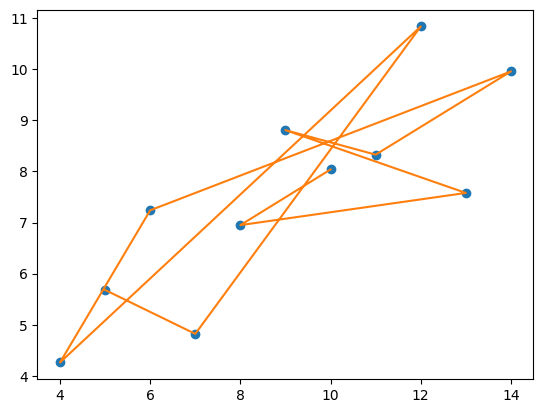

In [18]:
plt.plot(dataset_1['x'], dataset_1['y'], 'o') # 점으로 출력
plt.plot(dataset_1['x'], dataset_1['y'])
# 점만 봤을 땐 우상향을 하므로 양의 상관관계를 보인다고 할 수 있음

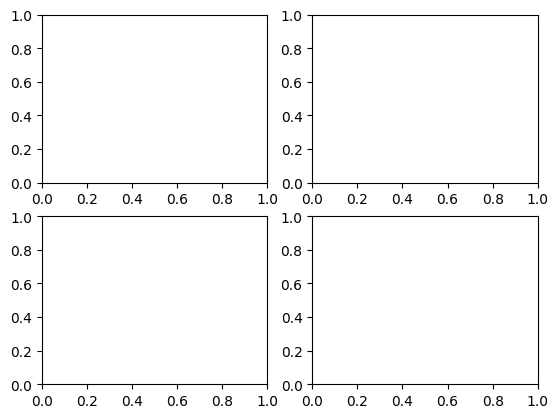

In [19]:
fig = plt.figure()
axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)

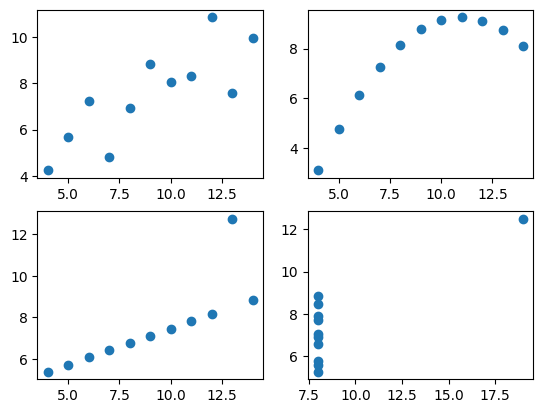

In [20]:
axes1.plot(dataset_1['x'], dataset_1['y'], 'o') 
axes2.plot(dataset_2['x'], dataset_2['y'], 'o') 
axes3.plot(dataset_3['x'], dataset_3['y'], 'o') 
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')
# 위 데이터들은 기술통계값은 전부 동일한 것들인데 차트로 그리면 전혀 다른 모습을 보임
fig

In [21]:
tips = sns.load_dataset("tips") 
print(tips.head())
print(type(tips))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>


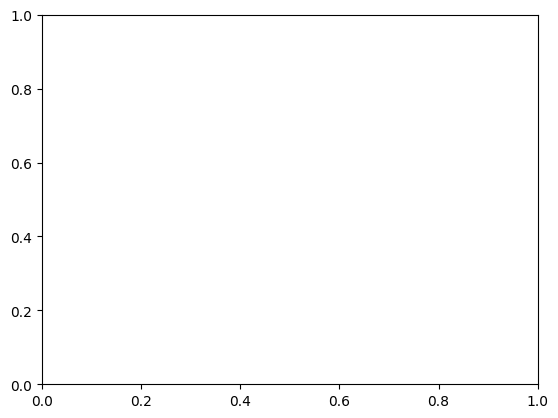

In [22]:
fig = plt.figure() # 그림 영역을 의미함. (도화지) 
axes1 = fig.add_subplot(1, 1, 1) # 여러개의 영역으로 나눠서 출력 가능 (도화지의 영역을 분리. 도화지 1장을 1개의 영역으로 사용)

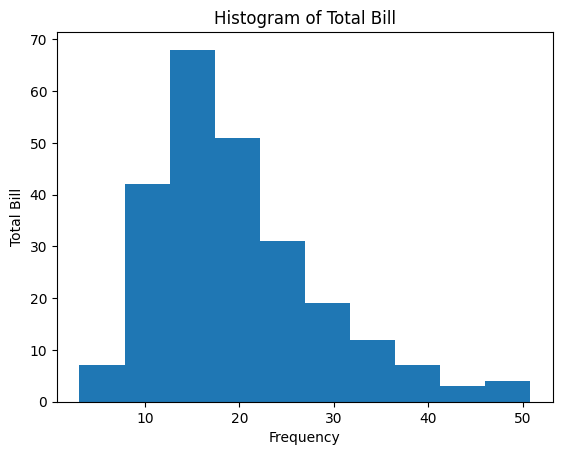

In [23]:
axes1.hist(tips['total_bill'], bins=10) 
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Frequency') 
axes1.set_ylabel('Total Bill')
fig # fig까지 입력해야 그림으로 출력함

Text(0, 0.5, 'Tip')

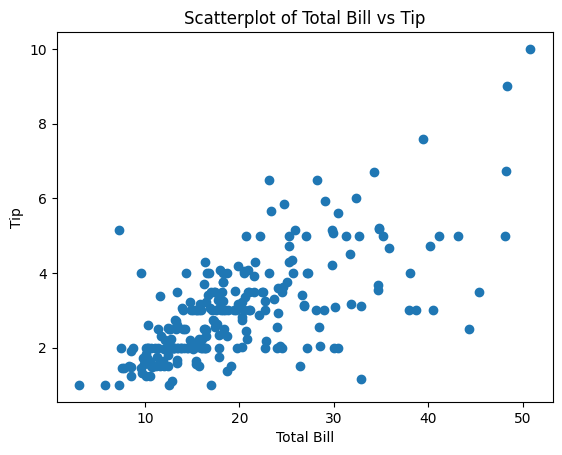

In [24]:
scatter_plot = plt.figure() 
axes1 = scatter_plot.add_subplot(1, 1, 1) 
axes1.scatter(tips['total_bill'], tips['tip']) 
axes1.set_title('Scatterplot of Total Bill vs Tip') 
axes1.set_xlabel('Total Bill') 
axes1.set_ylabel('Tip')
# 음식비가 비싸면 팁도 커지는 경향이 있음(양의 상관관계)

Text(0.5, 1.0, 'Boxplot of Tips by Sex')

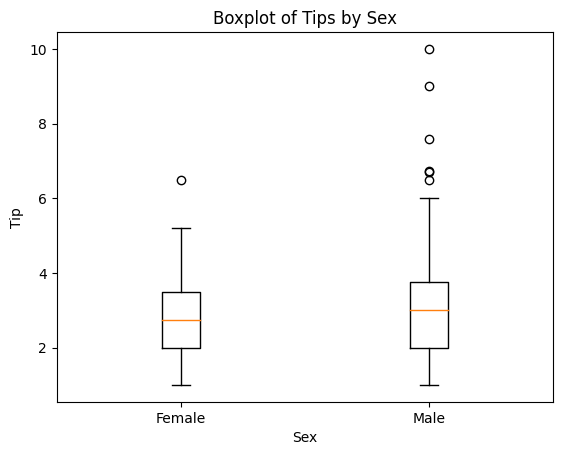

In [25]:
boxplot = plt.figure() 
axes1 = boxplot.add_subplot(1, 1, 1) 

axes1.boxplot( 
    [tips[tips['sex'] == 'Female']['tip'], 
     tips[tips['sex'] == 'Male']['tip']], 
    labels=['Female', 'Male'])

axes1.set_xlabel('Sex') 
axes1.set_ylabel('Tip') 
axes1.set_title('Boxplot of Tips by Sex')
# https://www.kdnuggets.com/2019/11/understanding-boxplots.html
# 위 주소 참고하여 공부해도 됨

# 주황선은 중위수
# 박스 위쪽 선은 3사분위수(Q3 = 75%), 아래는 1사분위수(Q1 = 25%) 범위임. 
# 이 범위는 IQR이라고 함(Q3-Q1)
# 동그라미 이전의 마지막 선은 최소치, 최대치로 구분됨
# 동그라미는 극단치(이상치) 라고도 함
# https://builtin.com/data-science/boxplot
# 위에서도 추가적인 설명이 있음
# 정규분포상 박스플롯이 어떻게 표기되는지..
# 쉽게 말해서 이상치는 중위수의 절대값 2.698배를 넘어서면 이상치라고 판단함. 비율로는 각 0.35%정도니 총 0.7%정도
# 간단하게 극단치를 제거하고 싶을 땐 양끝의 0.35%만 처리하면 되는 것임

In [26]:
ls

 C ����̺��� �������� �̸��� �����ϴ�.
 ���� �Ϸ� ��ȣ: C0D5-B7CC

 c:\Users\fkfma\Desktop\������-AI������\TIL\ds ���͸�

2024-06-03  ���� 09:07    <DIR>          .
2024-05-21  ���� 04:09    <DIR>          ..
2024-05-23  ���� 09:16    <DIR>          data
2024-05-21  ���� 01:45               928 data.npy
2024-05-24  ���� 02:50                28 data_to_csv.csv
2024-05-24  ���� 02:51                73 data_to_json.json
2024-05-24  ���� 09:14    <DIR>          data2
2024-05-21  ���� 01:54             1,330 data2.npz
2024-05-24  ���� 03:11             5,055 ex1_copy.xlsx
2024-05-23  ���� 02:39            81,932 gapminder.tsv
2024-05-03  ���� 02:38            20,656 kakao.csv
2024-05-03  ���� 03:04            10,734 kakao_pre.csv
2024-05-31  ���� 03:58    <DIR>          mental
2024-05-31  ���� 04:50           519,278 miniproject.ipynb
2024-05-27  ���� 09:17             8,192 mydata.sqlite
2024-05-03  ���� 04:36            43,800 np_day1.ipynb
2024-05-08  ���� 09:23            33,626 np_day2.ipynb

In [27]:
df1=pd.read_csv("data2/concat_1.csv")
df2=pd.read_csv("data2/concat_2.csv")
df3=pd.read_csv("data2/concat_3.csv")
df1

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3


In [28]:
row_concat = pd.concat([df1, df2, df3]) 
print(row_concat)

     A    B    C    D
0   a0   b0   c0   d0
1   a1   b1   c1   d1
2   a2   b2   c2   d2
3   a3   b3   c3   d3
0   a4   b4   c4   d4
1   a5   b5   c5   d5
2   a6   b6   c6   d6
3   a7   b7   c7   d7
0   a8   b8   c8   d8
1   a9   b9   c9   d9
2  a10  b10  c10  d10
3  a11  b11  c11  d11


In [29]:
print(row_concat.iloc[3, ])

A    a3
B    b3
C    c3
D    d3
Name: 3, dtype: object


In [30]:
gapminder=pd.read_csv("data2/gapminder.tsv", sep='\t')
gapminder

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [31]:
# 전세계인에 대해서 연도별 기대수명의 평균 구하기
gapminder.groupby('year')['lifeExp'].mean()
# gapminder.groupby('year').lifeExp.agg('mean') 
# agg는 함수가 없을 때 새로운 함수를 적용시키는 방법이라고 보면 됨

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [32]:
life_exp = gapminder.groupby(['year'])['lifeExp'].mean() 
life_exp[life_exp.index > 2000]

year
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [33]:
ebola=pd.read_csv("data2/country_timeseries.csv") # 에볼라 데이터셋(에볼라 바이러스로 사망자가 많았던 때가 있음)
ebola

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
ebola.info()
ebola.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

Date                   122
Day                    122
Cases_Guinea            93
Cases_Liberia           83
Cases_SierraLeone       87
Cases_Nigeria           38
Cases_Senegal           25
Cases_UnitedStates      18
Cases_Spain             16
Cases_Mali              12
Deaths_Guinea           92
Deaths_Liberia          81
Deaths_SierraLeone      87
Deaths_Nigeria          38
Deaths_Senegal          22
Deaths_UnitedStates     18
Deaths_Spain            16
Deaths_Mali             12
dtype: int64

In [35]:
num_rows = ebola.shape[0]
num_missing = num_rows - ebola.count() # null값만 추출
num_missing

Date                     0
Day                      0
Cases_Guinea            29
Cases_Liberia           39
Cases_SierraLeone       35
Cases_Nigeria           84
Cases_Senegal           97
Cases_UnitedStates     104
Cases_Spain            106
Cases_Mali             110
Deaths_Guinea           30
Deaths_Liberia          41
Deaths_SierraLeone      35
Deaths_Nigeria          84
Deaths_Senegal         100
Deaths_UnitedStates    104
Deaths_Spain           106
Deaths_Mali            110
dtype: int64

In [36]:
ebola.Cases_Guinea.value_counts()  # 에볼라 감염자 수가 3일동안은 86명이었다는 것임.(실제는 명확하지 않을 수 있음)

86.0      3
495.0     2
112.0     2
390.0     2
408.0     1
         ..
1199.0    1
1298.0    1
1350.0    1
1472.0    1
49.0      1
Name: Cases_Guinea, Length: 88, dtype: int64

In [37]:
ebola.Cases_Guinea.value_counts(dropna=False) # 결측값이 더 많음;;

NaN       29
86.0       3
495.0      2
112.0      2
390.0      2
          ..
1199.0     1
1298.0     1
1350.0     1
1472.0     1
49.0       1
Name: Cases_Guinea, Length: 89, dtype: int64

In [38]:
ebola.fillna(0)
ebola.fillna(method='ffill') # 다음 데이터로 메꾸기
ebola.fillna(method='bfill') # 이전데이터로 메꾸기
ebola.interpolate() # 보간법

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,2749.5,8157.0,9677.5,NaN,NaN,NaN,NaN,NaN,1753.0,3496.0,2871.0,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,66.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
118,3/26/2014,4,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,62.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
119,3/25/2014,3,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,60.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
120,3/24/2014,2,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,59.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0


In [39]:
ebola.dropna() # 하나 남음ㅋ

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
19,11/18/2014,241,2047.0,7082.0,6190.0,20.0,1.0,4.0,1.0,6.0,1214.0,2963.0,1267.0,8.0,0.0,1.0,0.0,6.0


In [40]:
ebola['Cases_Guinea'].head()

0    2776.0
1    2775.0
2    2769.0
3       NaN
4    2730.0
Name: Cases_Guinea, dtype: float64

In [41]:
ebola['Cases_Liberia'] .head()

0       NaN
1       NaN
2    8166.0
3    8157.0
4    8115.0
Name: Cases_Liberia, dtype: float64

In [42]:
ebola['Cases_SierraLeone'].head()

0    10030.0
1     9780.0
2     9722.0
3        NaN
4     9633.0
Name: Cases_SierraLeone, dtype: float64

In [43]:
ebola['Cases_multiple'] = ebola['Cases_Guinea'] + ebola['Cases_Liberia'] + ebola['Cases_SierraLeone']
ebola.Cases_multiple

0          NaN
1          NaN
2      20657.0
3          NaN
4      20478.0
        ...   
117      117.0
118        NaN
119        NaN
120        NaN
121        NaN
Name: Cases_multiple, Length: 122, dtype: float64

In [44]:
ebola_subset = ebola.loc[:, ['Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone', 'Cases_multiple']]
ebola_subset

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_multiple
0,2776.0,NaN,10030.0,NaN
1,2775.0,NaN,9780.0,NaN
2,2769.0,8166.0,9722.0,20657.0
3,NaN,8157.0,NaN,NaN
4,2730.0,8115.0,9633.0,20478.0
...,...,...,...,...
117,103.0,8.0,6.0,117.0
118,86.0,NaN,NaN,NaN
119,86.0,NaN,NaN,NaN
120,86.0,NaN,NaN,NaN


In [45]:
pew=pd.read_csv("data2/pew.csv")
print(pew.shape)
pew

(18, 11)


,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


In [46]:
# https://www.pewresearch.org/religion-datasets/
# religion = 종교
# 연봉 사이의 관계

In [47]:
pd.melt(pew) # 데이터프레임의 구조를 변경
# 열이름이 행으로 내려옴. 그리고 열에 속해있던 데이터들이 행으로 내려옴

,variable,value
0,religion,Agnostic
1,religion,Atheist
2,religion,Buddhist
3,religion,Catholic
4,religion,Don’t know/refused
...,...,...
193,Don't know/refused,73
194,Don't know/refused,18
195,Don't know/refused,71
196,Don't know/refused,8


In [48]:
pd.melt(pew, id_vars=['religion','<$10k'], var_name='income', value_name='count') 
# id_vars를 이용해서 유지할 열을 선택할 수 있음

,religion,<$10k,income,count
0,Agnostic,27,$10-20k,34
1,Atheist,12,$10-20k,27
2,Buddhist,27,$10-20k,21
3,Catholic,418,$10-20k,617
4,Don’t know/refused,15,$10-20k,14
...,...,...,...,...
157,Orthodox,13,Don't know/refused,73
158,Other Christian,9,Don't know/refused,18
159,Other Faiths,20,Don't know/refused,71
160,Other World Religions,5,Don't know/refused,8


In [49]:
billboard=pd.read_csv('data2/billboard.csv')
billboard

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,86,83.0,77.0,74.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,85,83.0,83.0,82.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,95,94.0,91.0,85.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,99,99.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# 	year	artist	track	time	date.entered	week	rating
# 0	2000	2 Pac	Baby Don't Cry (Keep...	4:22	2000-02-26	wk1	87.0
# 1	2000	2Ge+her	The Hardest Part Of ...	3:15	2000-09-02	wk1	91.0
# 2	2000	3 Doors Down	Kryptonite	3:53	2000-04-08	wk1	81.0
# 3	2000	3 Doors Down	Loser	4:24	2000-10-21	wk1	76.0
# 4	2000	504 Boyz	Wobble Wobble	3:35	2000-04-15	wk1	57.0
# 위와 같이 melt함수를 이용하여 만들어보기
billboard.melt(id_vars=['year','artist','track','time','date.entered'], var_name='week', value_name='rating').head(10)
# R언어 같은 곳에도 있는 함수임

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
5,2000,98^0,Give Me Just One Nig...,3:24,2000-08-19,wk1,51.0
6,2000,A*Teens,Dancing Queen,3:44,2000-07-08,wk1,97.0
7,2000,Aaliyah,I Don't Wanna,4:15,2000-01-29,wk1,84.0
8,2000,Aaliyah,Try Again,4:03,2000-03-18,wk1,59.0
9,2000,"Adams, Yolanda",Open My Heart,5:30,2000-08-26,wk1,76.0


In [51]:
#       Date	Day	variable	    value
# 0	1/5/2015	289	Cases_Guinea	2776.0
# 1	1/4/2015	288	Cases_Guinea	2775.0
# 2	1/3/2015	287	Cases_Guinea	2769.0
# 3	1/2/2015	286	Cases_Guinea	NaN
# 4	12/31/2014	284	Cases_Guinea	2730.0
# 위와 같이 만들기
ebola.iloc[:5, [0,1,2,3,10,11] ].melt(id_vars=['Date','Day'])
# pd.melt(ebola, id_vars=['Date','Day'])
ebola_long = pd.melt(ebola, id_vars=['Date', 'Day'])
print(ebola_long.head())

         Date  Day      variable   value
0    1/5/2015  289  Cases_Guinea  2776.0
1    1/4/2015  288  Cases_Guinea  2775.0
2    1/3/2015  287  Cases_Guinea  2769.0
3    1/2/2015  286  Cases_Guinea     NaN
4  12/31/2014  284  Cases_Guinea  2730.0


In [52]:
# [Cases, Guinea]
# [Cases, Guinea]
# [Cases, Guinea]
# [Cases, Guinea]
# [Cases, Guinea]
# 위와 같이 만들기
ebola_long.variable.str.split('_').head()

0    [Cases, Guinea]
1    [Cases, Guinea]
2    [Cases, Guinea]
3    [Cases, Guinea]
4    [Cases, Guinea]
Name: variable, dtype: object

In [53]:
variable_split = ebola_long.variable.str.split('_')
# 0       Cases
# 1       Cases
# 2       Cases
# 3       Cases
# 4       Cases
# 위와 같이 variable_split의 첫번째 값만 추출
variable_split.str[0].head() # 이런 처리에 대해서는 시리즈 데이터에 대해서만 사용 가능함
# variable_split.str.get(0) # 동일한 결과를 얻을 수 있음
# 이처럼 str을 사용하면 컬럼에 해당하는 데이터 자체에 접근할 수 있음

0    Cases
1    Cases
2    Cases
3    Cases
4    Cases
Name: variable, dtype: object

In [56]:
ebola_long['status']=variable_split.str.get(0)
ebola_long['country']=variable_split.str.get(1)
ebola_long.head(10)

,Date,Day,variable,value,status,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea
5,12/28/2014,281,Cases_Guinea,2706.0,Cases,Guinea
6,12/27/2014,280,Cases_Guinea,2695.0,Cases,Guinea
7,12/24/2014,277,Cases_Guinea,2630.0,Cases,Guinea
8,12/21/2014,273,Cases_Guinea,2597.0,Cases,Guinea
9,12/20/2014,272,Cases_Guinea,2571.0,Cases,Guinea


# 자료형 변환

In [57]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [60]:
tips['sex_str'] = tips.sex.astype(str)
tips

,total_bill,tip,sex,smoker,day,time,size,sex_str
0,16.99,1.01,Female,No,Sun,Dinner,2,Female
1,10.34,1.66,Male,No,Sun,Dinner,3,Male
2,21.01,3.50,Male,No,Sun,Dinner,3,Male
3,23.68,3.31,Male,No,Sun,Dinner,2,Male
4,24.59,3.61,Female,No,Sun,Dinner,4,Female
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,Male
240,27.18,2.00,Female,Yes,Sat,Dinner,2,Female
241,22.67,2.00,Male,Yes,Sat,Dinner,2,Male
242,17.82,1.75,Male,No,Sat,Dinner,2,Male


In [62]:
tips.dtypes # 성별 타입이 문자열로 변경됨

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object

In [64]:
tips['total_bill'] = tips.total_bill.astype(str)
tips.dtypes

total_bill      object
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object

In [65]:
tips['sex_cate']=tips['sex'].astype('category')
tips.dtypes

total_bill      object
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
sex_cate      category
dtype: object

# 함수
빈도 높은 함수 위주

In [66]:
d1 = '40°' 
m1 = "46'" 
s1 = '52.837"' 
u1 = 'N'

d2 = '73°' 
m2 = "58'" 
s2 = '26.302"' 
u2 = 'W'

In [67]:
coords = ' '.join([d1, m1, s1, u1, d2, m2, s2, u2])
print(coords)

40° 46' 52.837" N 73° 58' 26.302" W


In [68]:
multi_str = """Guard: What? Ridden on a horse?
King Arthur: Yes!
Guard: You're using coconuts!
King Arthur: What?
Guard: You've got ... coconut[s] and you're bangin' 'em together. 
""" 
print(multi_str)

Guard: What? Ridden on a horse?
King Arthur: Yes!
Guard: You're using coconuts!
King Arthur: What?
Guard: You've got ... coconut[s] and you're bangin' 'em together. 



In [71]:
# 라인별로 분리하고 싶을 때
multi_str_split = multi_str.splitlines() 
print(multi_str_split)

['Guard: What? Ridden on a horse?', 'King Arthur: Yes!', "Guard: You're using coconuts!", 'King Arthur: What?', "Guard: You've got ... coconut[s] and you're bangin' 'em together. "]


In [74]:
# Guard를 없애고 싶을 때
multi_str.replace('Guard: ', '')

"What? Ridden on a horse?\nKing Arthur: Yes!\nYou're using coconuts!\nKing Arthur: What?\nYou've got ... coconut[s] and you're bangin' 'em together. \n"

In [78]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [79]:
years = gapminder.year.unique()
print(years)

[1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 2002 2007]


In [81]:
# 1952년 자료만 추출하여 y1952에 저장
y1952 = gapminder[gapminder.year == 1952]
# y1952=df.loc[df.year==1952, :]

In [84]:
tips['size'].value_counts()

2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64

In [97]:
# 위에서 사용한 value counts의 값이 30이상인 데이터에 해당하는 것들만 추출
tips.groupby('size').filter(lambda x: x['size'].count() >= 30).head()

,total_bill,tip,sex,smoker,day,time,size,sex_str,sex_cate
0,16.99,1.01,Female,No,Sun,Dinner,2,Female,Female
1,10.34,1.66,Male,No,Sun,Dinner,3,Male,Male
2,21.01,3.50,Male,No,Sun,Dinner,3,Male,Male
3,23.68,3.31,Male,No,Sun,Dinner,2,Male,Male
4,24.59,3.61,Female,No,Sun,Dinner,4,Female,Female


In [100]:
tip10 =tips.sample(10, random_state=3) 
# 일부 데이터를 샘플링할 때, random_state값을 설정하면 다른 사람도 동일한 결과를 얻어낼 수 있음
tip10

,total_bill,tip,sex,smoker,day,time,size,sex_str,sex_cate
14,14.83,3.02,Female,No,Sun,Dinner,2,Female,Female
134,18.26,3.25,Female,No,Thur,Lunch,2,Female,Female
126,8.52,1.48,Male,No,Thur,Lunch,2,Male,Male
6,8.77,2.00,Male,No,Sun,Dinner,2,Male,Male
61,13.81,2.00,Male,Yes,Sat,Dinner,2,Male,Male
133,12.26,2.00,Female,No,Thur,Lunch,2,Female,Female
125,29.8,4.20,Female,No,Thur,Lunch,6,Female,Female
182,45.35,3.50,Male,Yes,Sun,Dinner,3,Male,Male
43,9.68,1.32,Male,No,Sun,Dinner,2,Male,Male
143,27.05,5.00,Female,No,Thur,Lunch,6,Female,Female


In [101]:
grouped = tip10.groupby('sex')
grouped

In [102]:
grouped.groups

{'Male': [126, 6, 61, 182, 43], 'Female': [14, 134, 133, 125, 143]}

In [107]:
grouped.mean(numeric_only=True) # 이런식으로 numeric 처리를 해줘야함...

,tip,size
sex,,
Male,2.060,2.2
Female,3.494,3.6


# 시계열 자료
인덱스가 날짜형으로 되어 있음

In [111]:
date_str = ["2018, 1, 1", "2018, 1, 4", "2018, 1, 5", "2018, 1, 6"]
idx = pd.to_datetime(date_str)
idx

DatetimeIndex(['2018-01-01', '2018-01-04', '2018-01-05', '2018-01-06'], dtype='datetime64[ns]', freq=None)

In [112]:
np.random.seed(0)
s = pd.Series(np.random.randn(4), index=idx)
s

2018-01-01    1.764052
2018-01-04    0.400157
2018-01-05    0.978738
2018-01-06    2.240893
dtype: float64

In [115]:
pd.date_range("2024-02-28","2024-06-03") # 날짜 범위로 생성됨

DatetimeIndex(['2024-02-28', '2024-02-29', '2024-03-01', '2024-03-02',
               '2024-03-03', '2024-03-04', '2024-03-05', '2024-03-06',
               '2024-03-07', '2024-03-08', '2024-03-09', '2024-03-10',
               '2024-03-11', '2024-03-12', '2024-03-13', '2024-03-14',
               '2024-03-15', '2024-03-16', '2024-03-17', '2024-03-18',
               '2024-03-19', '2024-03-20', '2024-03-21', '2024-03-22',
               '2024-03-23', '2024-03-24', '2024-03-25', '2024-03-26',
               '2024-03-27', '2024-03-28', '2024-03-29', '2024-03-30',
               '2024-03-31', '2024-04-01', '2024-04-02', '2024-04-03',
               '2024-04-04', '2024-04-05', '2024-04-06', '2024-04-07',
               '2024-04-08', '2024-04-09', '2024-04-10', '2024-04-11',
               '2024-04-12', '2024-04-13', '2024-04-14', '2024-04-15',
               '2024-04-16', '2024-04-17', '2024-04-18', '2024-04-19',
               '2024-04-20', '2024-04-21', '2024-04-22', '2024-04-23',
      

In [117]:
pd.date_range(start="2024-4-1", periods=50) # 50일간의 데이터를 인덱스로 설정

DatetimeIndex(['2024-04-01', '2024-04-02', '2024-04-03', '2024-04-04',
               '2024-04-05', '2024-04-06', '2024-04-07', '2024-04-08',
               '2024-04-09', '2024-04-10', '2024-04-11', '2024-04-12',
               '2024-04-13', '2024-04-14', '2024-04-15', '2024-04-16',
               '2024-04-17', '2024-04-18', '2024-04-19', '2024-04-20',
               '2024-04-21', '2024-04-22', '2024-04-23', '2024-04-24',
               '2024-04-25', '2024-04-26', '2024-04-27', '2024-04-28',
               '2024-04-29', '2024-04-30', '2024-05-01', '2024-05-02',
               '2024-05-03', '2024-05-04', '2024-05-05', '2024-05-06',
               '2024-05-07', '2024-05-08', '2024-05-09', '2024-05-10',
               '2024-05-11', '2024-05-12', '2024-05-13', '2024-05-14',
               '2024-05-15', '2024-05-16', '2024-05-17', '2024-05-18',
               '2024-05-19', '2024-05-20'],
              dtype='datetime64[ns]', freq='D')

In [119]:
pd.date_range(start="2024-4-1", periods=50, freq='h') # freq는 단위를 설정하는데 h는 시간이며 기본세팅은 d(day)로 되어 있음
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects
# 위 주소를 참고하여 다양하게 응용이 가능함

DatetimeIndex(['2024-04-01 00:00:00', '2024-04-01 01:00:00',
               '2024-04-01 02:00:00', '2024-04-01 03:00:00',
               '2024-04-01 04:00:00', '2024-04-01 05:00:00',
               '2024-04-01 06:00:00', '2024-04-01 07:00:00',
               '2024-04-01 08:00:00', '2024-04-01 09:00:00',
               '2024-04-01 10:00:00', '2024-04-01 11:00:00',
               '2024-04-01 12:00:00', '2024-04-01 13:00:00',
               '2024-04-01 14:00:00', '2024-04-01 15:00:00',
               '2024-04-01 16:00:00', '2024-04-01 17:00:00',
               '2024-04-01 18:00:00', '2024-04-01 19:00:00',
               '2024-04-01 20:00:00', '2024-04-01 21:00:00',
               '2024-04-01 22:00:00', '2024-04-01 23:00:00',
               '2024-04-02 00:00:00', '2024-04-02 01:00:00',
               '2024-04-02 02:00:00', '2024-04-02 03:00:00',
               '2024-04-02 04:00:00', '2024-04-02 05:00:00',
               '2024-04-02 06:00:00', '2024-04-02 07:00:00',
               '2024-04-

- s: 초
- T: 분
- H: 시간
- D: 일(day)
- B: 주말이 아닌 평일
- W: 주(일요일)
- W-MON: 주(월요일)
- M: 각 달(month)의 마지막 날
- MS: 각 달의 첫날
- BM: 주말이 아닌 평일 중에서 각 달의 마지막 날
- BMS: 주말이 아닌 평일 중에서 각 달의 첫날
- WOM-2THU: 각 달의 두번째 목요일
- Q-JAN: 각 분기의 첫달의 마지막 날
- Q-DEC: 각 분기의 마지막 달의 마지막 날

In [123]:
pd.date_range("2024-6-3", "2024-12-31", freq="w") # week 단위로 연말까지 인덱스 생성

DatetimeIndex(['2024-06-09', '2024-06-16', '2024-06-23', '2024-06-30',
               '2024-07-07', '2024-07-14', '2024-07-21', '2024-07-28',
               '2024-08-04', '2024-08-11', '2024-08-18', '2024-08-25',
               '2024-09-01', '2024-09-08', '2024-09-15', '2024-09-22',
               '2024-09-29', '2024-10-06', '2024-10-13', '2024-10-20',
               '2024-10-27', '2024-11-03', '2024-11-10', '2024-11-17',
               '2024-11-24', '2024-12-01', '2024-12-08', '2024-12-15',
               '2024-12-22', '2024-12-29'],
              dtype='datetime64[ns]', freq='W-SUN')

shift

In [124]:
np.random.seed(0)
ts = pd.Series(np.random.randn(4), index=pd.date_range(
    "2024-8-1", periods=4, freq="M")) # 달의 마지막 일
ts

2024-08-31    1.764052
2024-09-30    0.400157
2024-10-31    0.978738
2024-11-30    2.240893
Freq: M, dtype: float64

In [126]:
ts.shift(1) # 데이터의 값을 한칸씩 미루기

2024-08-31         NaN
2024-09-30    1.764052
2024-10-31    0.400157
2024-11-30    0.978738
Freq: M, dtype: float64

In [128]:
ts.shift(-1) # 데이터 값을 한칸씩 당기기

2024-08-31    0.400157
2024-09-30    0.978738
2024-10-31    2.240893
2024-11-30         NaN
Freq: M, dtype: float64

In [129]:
ts = pd.Series(np.random.randn(100), index=pd.date_range(
    "2024-1-1", periods=100, freq="D"))
ts

2024-01-01    1.867558
2024-01-02   -0.977278
2024-01-03    0.950088
2024-01-04   -0.151357
2024-01-05   -0.103219
                ...   
2024-04-05    0.401989
2024-04-06    1.883151
2024-04-07   -1.347759
2024-04-08   -1.270485
2024-04-09    0.969397
Freq: D, Length: 100, dtype: float64

resample

In [134]:
ts.resample('w').mean() # 주 단위 추출 및 추출된 데이터의 평균(1일부터 7일, 8일부터 14일,...)

2024-01-07    0.305776
2024-01-14    0.629064
2024-01-21   -0.006910
2024-01-28    0.277065
2024-02-04   -0.144972
2024-02-11   -0.496299
2024-02-18   -0.474473
2024-02-25   -0.201222
2024-03-03   -0.775142
2024-03-10    0.052868
2024-03-17   -0.450379
2024-03-24    0.601892
2024-03-31    0.334893
2024-04-07    0.509605
2024-04-14   -0.150544
Freq: W-SUN, dtype: float64

In [135]:
s = pd.Series(pd.date_range("2020-12-25", periods=100, freq="D"))
s

0    2020-12-25
1    2020-12-26
2    2020-12-27
3    2020-12-28
4    2020-12-29
        ...    
95   2021-03-30
96   2021-03-31
97   2021-04-01
98   2021-04-02
99   2021-04-03
Length: 100, dtype: datetime64[ns]

In [143]:
s.dt.year # 여태까지 데이터를 추출할 땐 str을 썼지만 이번엔 datetime형식의 자료이므로 dt라는 접근자를 사용해야함
s.dt.weekday
s.dt.strftime('%Y년 %m월 %d일') # 변환 출력도 가능함(datetime라이브러리 변환과 동일)

0     2020년 12월 25일
1     2020년 12월 26일
2     2020년 12월 27일
3     2020년 12월 28일
4     2020년 12월 29일
          ...      
95    2021년 03월 30일
96    2021년 03월 31일
97    2021년 04월 01일
98    2021년 04월 02일
99    2021년 04월 03일
Length: 100, dtype: object

In [145]:
from datetime import datetime
datetime.now()
datetime.today()

datetime.datetime(2024, 6, 3, 14, 32, 0, 851080)

In [152]:
ebola['data_dt'] = pd.to_datetime(ebola.Date)
ebola

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali,Cases_multiple,data_dt
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-05
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-04
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN,20657.0,2015-01-03
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-02
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN,20478.0,2014-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN,117.0,2014-03-27
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-03-26
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-03-25
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-03-24


In [159]:
test_df1 = pd.DataFrame({'order_day':['01/01/15', '02/01/15', '03/01/15']})
test_df1

,order_day
0,01/01/15
1,02/01/15
2,03/01/15


In [166]:
pd.to_datetime(test_df1['order_day']) # 주피터에서는 경고문이 나옴
pd.to_datetime(test_df1['order_day'], format="%m/%d/%y") # 이것이 권장사항

0   2015-01-01
1   2015-02-01
2   2015-03-01
Name: order_day, dtype: datetime64[ns]

In [167]:
test_df2 = pd.DataFrame({'order_day':['01-01-15', '02-01-15', '03-01-15']})
test_df2

,order_day
0,01-01-15
1,02-01-15
2,03-01-15


In [171]:
# 일월연도로 변환해보기
pd.to_datetime(test_df2['order_day'], format='%d-%m-%y') # 이런식으로 많이 쓰임

0   2015-01-01
1   2015-01-02
2   2015-01-03
Name: order_day, dtype: datetime64[ns]

In [173]:
ebola_df = pd.read_csv('data2/country_timeseries.csv', parse_dates=['Date'])
ebola_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [176]:
ebola_df.Date.dt.year

0      2015
1      2015
2      2015
3      2015
4      2014
       ... 
117    2014
118    2014
119    2014
120    2014
121    2014
Name: Date, Length: 122, dtype: int64

In [177]:
ebola_df

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2015-01-05,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2015-01-04,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2015-01-03,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,2015-01-02,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-12-31,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2014-03-27,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,2014-03-26,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,2014-03-25,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,2014-03-24,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
# 에볼라 바이러스가 리베리아(Cases_Liberia)에서 발병한 데이터 중 누적 발병자 수의 최대값에 해당되는 날짜?
# ebola_df[ebola_df['Cases_Liberia'].max()]
ebola_df[ebola_df.Cases_Liberia == ebola_df['Cases_Liberia'].max()]['Date']
# pd.to_datetime(ebola_df.Cases_Liberia.max()) # 왜인지 이렇게 제출하던데 이건 내용이 틀림...

2   2015-01-03
Name: Date, dtype: datetime64[ns]

In [198]:
# 파산한 은행목록임;;
banks = pd.read_csv('data2/banklist.csv', parse_dates=[5,6]) # 인덱스를 지정해서 어떤 타입으로 읽을 것인지 지정 가능함
banks.info() # 결측값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null    object        
 3   CERT                   555 non-null    int64         
 4   Acquiring Institution  555 non-null    object        
 5   Closing Date           555 non-null    datetime64[ns]
 6   Updated Date           555 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.5+ KB


In [224]:
banks['Closing Date'].dt.quarter.head() # 분기를 나눌 수 있음

0    4
1    4
2    2
3    2
4    2
Name: Closing Date, dtype: int64

In [223]:
banks['Closing Date'].dt.year
# banks closing date열을 참조하여 연도별로 문을 닫은 은행의 갯수를 출력
banks.groupby(banks['Closing Date'].dt.year)['Closing Date'].count()
# banks['Closing Date'].dt.year.value_counts().sort_index()

Closing Date
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
Name: Closing Date, dtype: int64

In [226]:
!pip install pandas_datareader

     ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
     -------------------------------------- 109.5/109.5 kB 6.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [241]:
!pip install yfinance

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-api-core 2.11.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.19.0 which is incompatible.

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/73.5 kB ? eta -:--:--
     ---------------------------------------- 73.5/73.5 kB 4.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ----------- ---------------------------- 0.8/3.0 MB 17.8 MB/s eta 0:00:01
     ----------------------- ---------------- 1.8/3.0 MB 18.7 MB/s eta 0:00:01
     ----------------------------------- ---- 2.7/3.0 MB 18.9 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 17.2 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/64.9 kB ? eta -:--:--
     ---------------------------------------- 64.9/64.9 kB

In [227]:
import pandas_datareader as pdr
# pdr.get_data_quandl('TSLA', api_key=apikey)
# www.quandl.com 가입 -> api 키 발급

In [246]:
# import pandas_datareader as pdr
# from datetime import datetime

# # Yahoo Finance에서 Apple(AAPL) 주식 가격 데이터 가져오기
# start = datetime(2020, 1, 1)
# end = datetime(2020, 12, 31)
# aapl = pdr.get_data_yahoo('AAPL', start=start, end=end) # 안됨

# print(aapl.head())  # 데이터의 처음 몇 줄 출력

In [256]:
import yfinance as yf
from datetime import datetime

start = datetime(2020, 1, 1)
end = datetime(2020, 12, 31)
aapl = yf.download('AAPL', start=start, end=end)
tsla = yf.download('TSLA', start=start, end=end)
aapl.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960457,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251137,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826851,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484337,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650360,132079200


In [244]:
# start = datetime(2020, 1, 1)
# end = datetime(2020, 12, 31)
# aapl = pdr.get_data_yahoo('TSLA', start=start, end=end)

In [263]:
# https://finance.yahoo.com/quote/TSLA/history/?period1=1709448105&period2=1717396891
# 3개월치
tsla_df = pd.read_csv('TSLA.csv')
tsla_df.info()
tsla_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       63 non-null     object 
 1   Open       63 non-null     float64
 2   High       63 non-null     float64
 3   Low        63 non-null     float64
 4   Close      63 non-null     float64
 5   Adj Close  63 non-null     float64
 6   Volume     63 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 3.6+ KB


,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-03-04,198.729996,199.750000,186.720001,188.139999,188.139999,134334900
1,2024-03-05,183.050003,184.589996,177.570007,180.740005,180.740005,119660800
2,2024-03-06,179.990005,181.580002,173.699997,176.539993,176.539993,107920900
3,2024-03-07,174.350006,180.039993,173.699997,178.649994,178.649994,102129000
4,2024-03-08,181.500000,182.729996,174.699997,175.339996,175.339996,85315300
...,...,...,...,...,...,...,...
58,2024-05-24,174.839996,180.080002,173.729996,179.240005,179.240005,65479700
59,2024-05-28,176.399994,178.250000,173.160004,176.750000,176.750000,59736600
60,2024-05-29,174.190002,178.149994,173.929993,176.190002,176.190002,54782600
61,2024-05-30,178.580002,182.669998,175.380005,178.789993,178.789993,77784800


In [253]:
# Date 열에서 월을 추출하시오
pd.to_datetime(tsla_df['Date']).dt.month

0     3
1     3
2     3
3     3
4     3
     ..
58    5
59    5
60    5
61    5
62    5
Name: Date, Length: 63, dtype: int64

In [267]:
# 2024년 4월에 해당되는 자료를 출력하기
tsla_df['Date'] = pd.to_datetime(tsla_df['Date'])
tsla_df[(tsla_df.Date.dt.month == 4) & (tsla_df.Date.dt.year == 2024)]

,Date,Open,High,Low,Close,Adj Close,Volume
19,2024-04-01,176.169998,176.750000,170.210007,175.220001,175.220001,81562100
20,2024-04-02,164.750000,167.690002,163.429993,166.630005,166.630005,116650600
21,2024-04-03,164.020004,168.820007,163.279999,168.380005,168.380005,82950100
22,2024-04-04,170.070007,177.190002,168.009995,171.110001,171.110001,123162000
23,2024-04-05,169.080002,170.860001,160.509995,164.899994,164.899994,141250700
24,2024-04-08,169.339996,174.500000,167.789993,172.979996,172.979996,104423300
25,2024-04-09,172.910004,179.220001,171.919998,176.880005,176.880005,103232700
26,2024-04-10,173.039993,174.929993,170.009995,171.759995,171.759995,84532400
27,2024-04-11,172.550003,175.880005,168.509995,174.600006,174.600006,94516000
28,2024-04-12,172.339996,173.809998,170.360001,171.050003,171.050003,64506600


In [270]:
# 내일은 babynames 분석
# 시간이 된다면 복지데이터도 분석
# 수요일은 통계분석 수업(분산같은 것들)
# 목요일부터 머신러닝
# plotly, tablaeu 쪽은 금주 내에...
# 다음주 월요일에는 캐글 도전해볼 예정

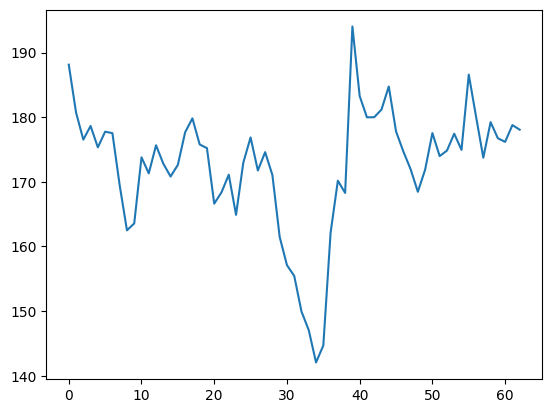

63


True

In [379]:
import pandas as pd
import numpy as np

# 1. 테슬라
tsla = pd.read_csv('TSLA.csv', parse_dates=['Date'])
# 1) High / Low /Close / Volume 열에 대해 최대/최소/평균/중위수 출력
tsla.describe()
# 2) Open열과 Close 열 값의 차이가 가장 큰 날짜는 언제인가?
tsla['diff'] = tsla.Open - tsla.Close
tsla[tsla['diff'].abs() == tsla['diff'].abs().max()].Date
# 3) Volume(거래량)이 가장 높았던 날에는 주가가 올랐을까 내렸을까?
tsla[tsla.Volume == tsla.Volume.max()]['diff'] # diff값이 음수면 오른 것임
# 4) 3,4,5월 중에서 평균적으로 종가(Close)가 가장 높은 달은?
tsla.groupby(tsla.Date.dt.month)['Close'].mean().sort_values().index[-1]
# 5) 종가 및 거래량 데이터를 활용하여 시각화(선그래프) 출력
import matplotlib.pyplot as plt
tsla
plt.plot(tsla.Close)
plt.show()
# 6) 주가가 오른 날이 많았을까? 내린 날이 많았을까?
print(tsla.shape[0]) # 주식 열린 일수
tsla[tsla['diff']>0]['diff'].count() # 주식이 내린 횟수(시작-종료이므로 양수이면 내려간 것)
(tsla.shape[0] / 2) < (tsla[tsla['diff']>0]['diff'].count()) # diff가 더 크므로 내린날이 더 많았음

In [560]:
# 2. 인구
df = pd.read_csv('data2/gapminder.tsv', sep='\t')
# 1) 대륙별로 기대수명이 평균적으로 가장 높은 대륙은?
df.groupby('continent')['lifeExp'].mean().index[-1]
# 2) 대륙 별 국가의 개수를 출력하시오
df.groupby('continent')['country'].agg('count')/len(df.year.unique())
# 3) 기대수명이 가장 높은 국가는?
df[df.lifeExp == df.lifeExp.max()].country
# 4) 1952~2007년까지 gdp가 가장 크게 증가한 나라는? 증가율은?
df2 = df[(df['year']==1952)].reset_index(drop=True)
df2007 = df[df.year == 2007]['gdpPercap'].reset_index(drop=True)
df1952 = df[df.year == 1952]['gdpPercap'].reset_index(drop=True)
df2['diff'] = df2007 - df1952
res_country = df2[df2['diff'] == df2['diff'].max()].country.values[0] # 싱가포르
str((df2[df2.country == res_country]['diff']/  df[df['country'] == res_country][df.year == 1952].gdpPercap.values[0] * 100).values[0])+'%'
# diff값 / 1952년도 gdp값 * 100(백분율 계산)
# 5) 1952~2007년까지 pop가 가장 크게 증가한 나라는? 증가율은?
df3 = df[(df['year']==1952)].reset_index(drop=True)
df3['diffPop'] = df[df['year'] == 2007]['pop'].reset_index(drop=True) - df[df['year'] == 1952]['pop'].reset_index(drop=True)
res_df = df3[df3.diffPop == df3.diffPop.max()] # 최대 차이를 보이는 국가는 중국
str((res_df.diffPop/res_df['pop'] * 100).values[0])+'%'

C:\Users\fkfma\AppData\Local\Temp\ipykernel_21088\1633129771.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  str((df2[df2.country == res_country]['diff']/  df[df['country'] == res_country][df.year == 1952].gdpPercap.values[0] * 100).values[0])+'%'


'137.06085910608337%'